In [1]:
!pip install xgboost

In [2]:
# 1. Librerías necesarias ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
# 2. Cargar archivo desde Colab ===
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("datasets-ISTAC_E41001A_000019_1.0_20250602135544.csv")

Saving datasets-ISTAC_E41001A_000019_1.0_20250602135544.csv to datasets-ISTAC_E41001A_000019_1.0_20250602135544.csv


In [4]:
# 3. Vista general
print("Dimensiones del dataset:", df.shape)
print("\nColumnas:", df.columns.tolist())
print("\nTipos de datos:\n", df.dtypes)
print("\nValores únicos por columna:\n", df.nunique())

Dimensiones del dataset: (465, 14)

Columnas: ['TERRITORIO#es', 'TERRITORIO_CODE', 'TIME_PERIOD#es', 'TIME_PERIOD_CODE', 'SEXO#es', 'SEXO_CODE', 'EDAD#es', 'EDAD_CODE', 'MEDIDAS#es', 'MEDIDAS_CODE', 'OBS_VALUE', 'ESTADO_OBSERVACION#es', 'CONFIDENCIALIDAD_OBSERVACION#es', 'NOTAS_OBSERVACION#es']

Tipos de datos:
 TERRITORIO#es                       object
TERRITORIO_CODE                     object
TIME_PERIOD#es                       int64
TIME_PERIOD_CODE                     int64
SEXO#es                             object
SEXO_CODE                           object
EDAD#es                             object
EDAD_CODE                           object
MEDIDAS#es                          object
MEDIDAS_CODE                        object
OBS_VALUE                          float64
ESTADO_OBSERVACION#es              float64
CONFIDENCIALIDAD_OBSERVACION#es    float64
NOTAS_OBSERVACION#es               float64
dtype: object

Valores únicos por columna:
 TERRITORIO#es                        1
T

In [5]:
# Describe de las variables numéricas
print("\nResumen estadístico de las variables numéricas:")
print(df.describe())


Resumen estadístico de las variables numéricas:
       TIME_PERIOD#es  TIME_PERIOD_CODE   OBS_VALUE  ESTADO_OBSERVACION#es  \
count      465.000000        465.000000  465.000000                    0.0   
mean      2008.000000       2008.000000   76.151398                    NaN   
std          8.953905          8.953905   15.393049                    NaN   
min       1993.000000       1993.000000   37.600000                    NaN   
25%       2000.000000       2000.000000   64.400000                    NaN   
50%       2008.000000       2008.000000   80.000000                    NaN   
75%       2016.000000       2016.000000   89.700000                    NaN   
max       2023.000000       2023.000000   96.900000                    NaN   

       CONFIDENCIALIDAD_OBSERVACION#es  NOTAS_OBSERVACION#es  
count                              0.0                   0.0  
mean                               NaN                   NaN  
std                                NaN                   Na

In [6]:
# 4. Limpieza de los datos
df = df[df['SEXO#es'].isin(['Mujeres', 'Hombres'])]  # Eliminar "Total"
df['TIME_PERIOD#es'] = pd.to_numeric(df['TIME_PERIOD#es'], errors='coerce')
df['OBS_VALUE'] = pd.to_numeric(df['OBS_VALUE'], errors='coerce')

<ipython-input-6-436e3a7670ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TIME_PERIOD#es'] = pd.to_numeric(df['TIME_PERIOD#es'], errors='coerce')
<ipython-input-6-436e3a7670ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OBS_VALUE'] = pd.to_numeric(df['OBS_VALUE'], errors='coerce')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

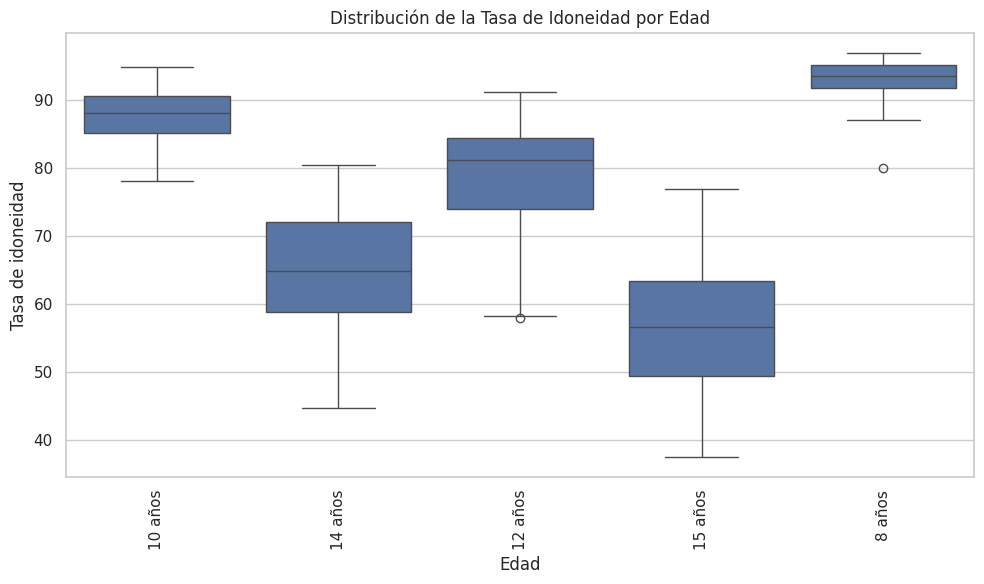

In [7]:
# 5. EDA: Distribución de la tasa por edad

plt.figure()
sns.boxplot(data=df, x='EDAD#es', y='OBS_VALUE')
plt.xticks(rotation=90)
plt.title('Distribución de la Tasa de Idoneidad por Edad')
plt.ylabel('Tasa de idoneidad')
plt.xlabel('Edad')
plt.tight_layout()

# Guardar como imagen
plt.savefig('boxplot_tasa_idoneidad_por_edad.png', dpi=300)

# Descargar al ordenador
files.download('boxplot_tasa_idoneidad_por_edad.png')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

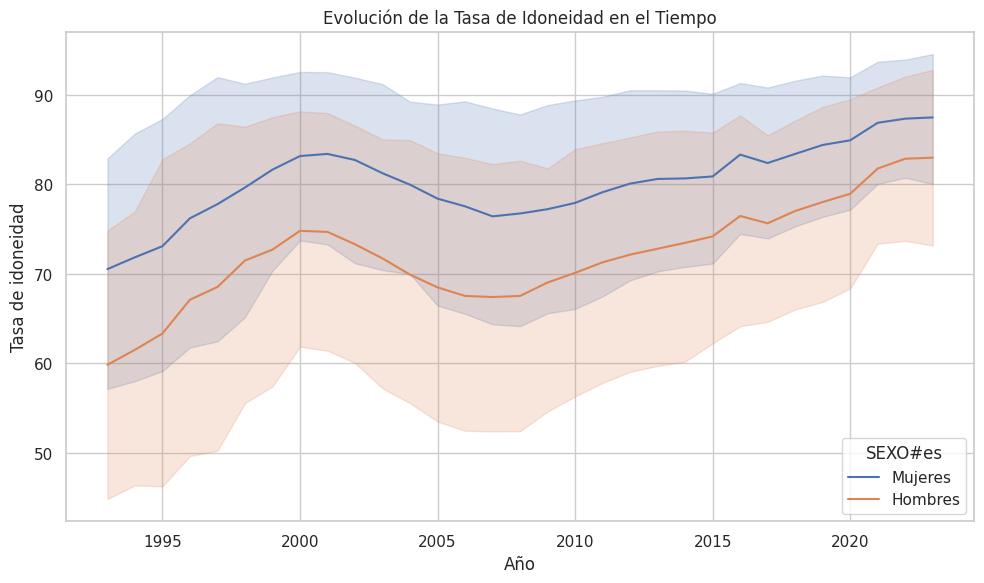

In [8]:
# 6. EDA: Evolución temporal por sexo

plt.figure()
sns.lineplot(data=df, x='TIME_PERIOD#es', y='OBS_VALUE', hue='SEXO#es', estimator='mean')
plt.title('Evolución de la Tasa de Idoneidad en el Tiempo')
plt.ylabel('Tasa de idoneidad')
plt.xlabel('Año')
plt.tight_layout()

# Guardar como imagen PNG
plt.savefig('lineplot_evolucion_tasa_sexo.png', dpi=300)

# Descargar automáticamente
files.download('lineplot_evolucion_tasa_sexo.png')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

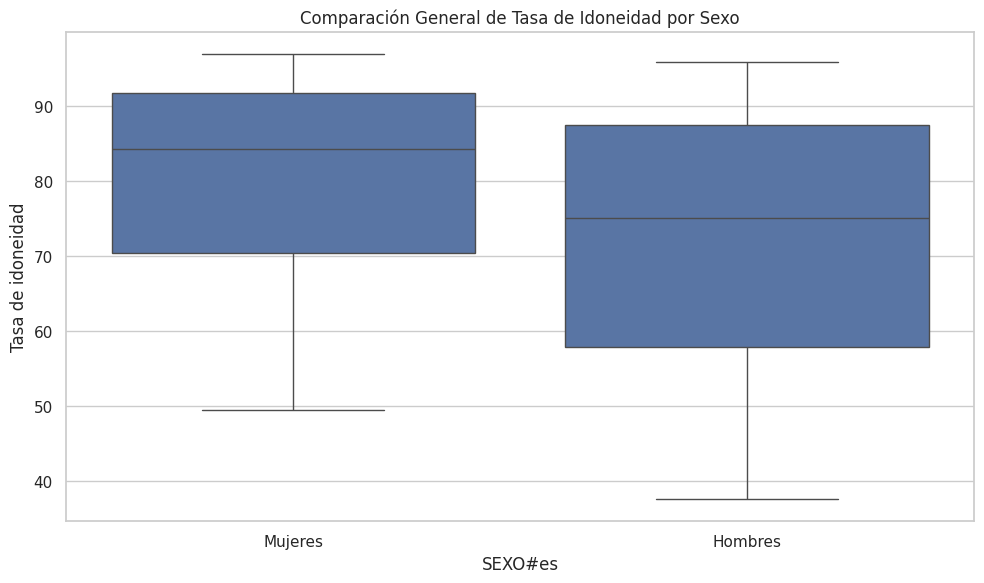

In [9]:
# 7. EDA: Comparación por sexo

plt.figure()
sns.boxplot(data=df, x='SEXO#es', y='OBS_VALUE')
plt.title('Comparación General de Tasa de Idoneidad por Sexo')
plt.ylabel('Tasa de idoneidad')
plt.tight_layout()

# Guardar como imagen PNG
plt.savefig('boxplot_comparacion_sexo.png', dpi=300)

# Descargar automáticamente
files.download('boxplot_comparacion_sexo.png')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

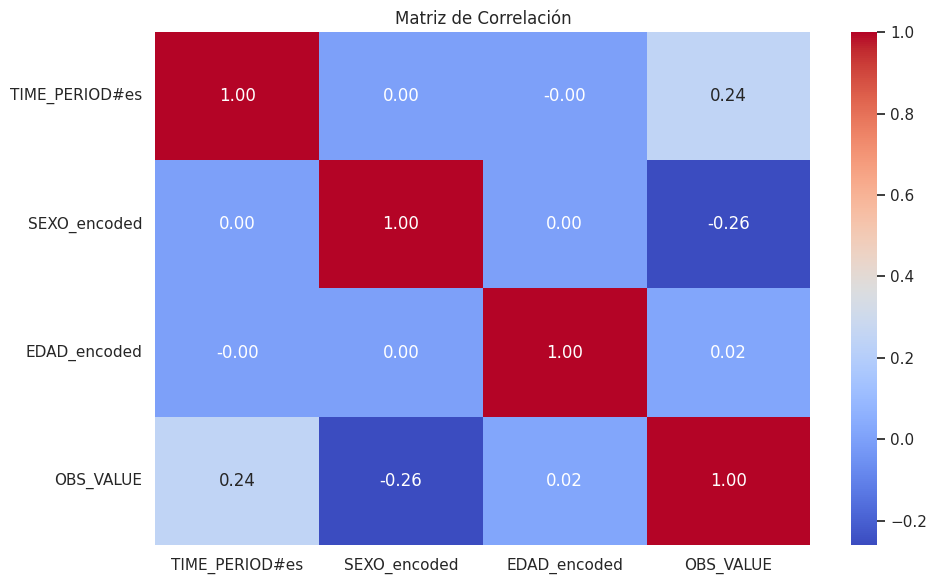

In [10]:
# 8. EDA: Mapa de calor de correlaciones

df_encoded = df.copy()
df_encoded['SEXO_encoded'] = df_encoded['SEXO#es'].map({'Mujeres': 0, 'Hombres': 1})
df_encoded['EDAD_encoded'] = pd.factorize(df_encoded['EDAD#es'])[0]

correlation = df_encoded[['TIME_PERIOD#es', 'SEXO_encoded', 'EDAD_encoded', 'OBS_VALUE']].corr()

plt.figure()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.tight_layout()

# Guardar como imagen PNG
plt.savefig('heatmap_correlacion_tasa.png', dpi=300)

# Descargar automáticamente
files.download('heatmap_correlacion_tasa.png')

plt.show()

In [11]:
# 9. EDA: Datos faltantes
print("\nValores nulos por columna:\n", df.isnull().sum())


Valores nulos por columna:
 TERRITORIO#es                        0
TERRITORIO_CODE                      0
TIME_PERIOD#es                       0
TIME_PERIOD_CODE                     0
SEXO#es                              0
SEXO_CODE                            0
EDAD#es                              0
EDAD_CODE                            0
MEDIDAS#es                           0
MEDIDAS_CODE                         0
OBS_VALUE                            0
ESTADO_OBSERVACION#es              310
CONFIDENCIALIDAD_OBSERVACION#es    310
NOTAS_OBSERVACION#es               310
dtype: int64


In [12]:
# Borrado de valores nulos
df = df.drop(columns=['ESTADO_OBSERVACION#es', 'CONFIDENCIALIDAD_OBSERVACION#es', 'NOTAS_OBSERVACION#es'])

In [13]:
# 10. Preprocesamiento para modelado
le_sexo = LabelEncoder()
le_edad = LabelEncoder()
df['SEXO_encoded'] = le_sexo.fit_transform(df['SEXO#es'])
df['EDAD_encoded'] = le_edad.fit_transform(df['EDAD#es'])

X = df[['TIME_PERIOD#es', 'SEXO_encoded', 'EDAD_encoded']]
y = df['OBS_VALUE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# 11. Modelo: Random Forest

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("\nRandom Forest:")
print(f" - MSE: {mse_rf:.2f}")
print(f" - R² : {r2_rf:.3f}")
print(f" - MAE: {mae_rf:.2f}")


Random Forest:
 - MSE: 3.61
 - R² : 0.982
 - MAE: 1.29


In [15]:
# 12. Modelo: XGBoost

# Crear modelo de XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Entrenar
xgb_model.fit(X_train, y_train)

# Predecir
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("XGBoost:")
print(f" - MSE: {mse_xgb:.2f}")
print(f" - R² : {r2_xgb:.3f}")
print(f" - MAE: {mae_xgb:.2f}")

XGBoost:
 - MSE: 2.89
 - R² : 0.985
 - MAE: 1.15


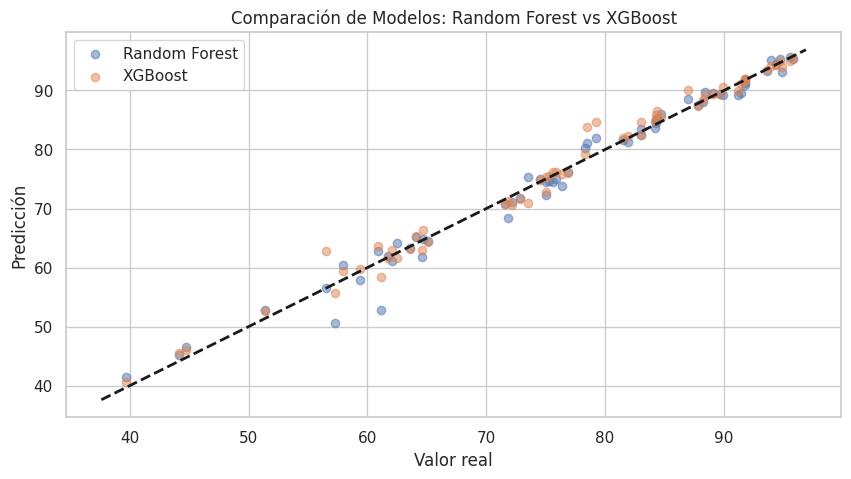

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label='XGBoost')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Comparación de Modelos: Random Forest vs XGBoost')
plt.legend()
plt.grid(True)
plt.show()

### Interpretación
MSE más bajo (2.89) → Las predicciones están más cerca del valor real.

R² más alto (0.985) → XGBoost explica el 98.5% de la varianza en la tasa de idoneidad.

MAE más bajo (1.15) → las predicciones están en promedio, a solo 1.15 puntos de distancia del valor real.

Esto sugiere que XGBoost capta mejor las interacciones entre año, edad y sexo que Random Forest.

In [17]:
# 13. Predicción de tasas futuras con XGBoost ===

# Años futuros que quieres predecir
anios_futuros = [2026, 2027, 2028, 2029, 2030]

# Usar los mismos sexos y edades que ya están codificados
sexos = le_sexo.transform(['Mujeres', 'Hombres'])
edades = le_edad.classes_

In [18]:
# Generar combinaciones año-sexo-edad
futuro_datos = []

for anio in anios_futuros:
    for sexo in sexos:
        for edad_index, edad_str in enumerate(edades):
            futuro_datos.append({
                'TIME_PERIOD#es': anio,
                'SEXO_encoded': sexo,
                'EDAD_encoded': edad_index
            })

df_futuro = pd.DataFrame(futuro_datos)

In [19]:
# Predecir con el modelo XGBoost
df_futuro['Prediccion'] = xgb_model.predict(df_futuro)

In [20]:
# Decodificar variables para visualización
df_futuro['SEXO'] = le_sexo.inverse_transform(df_futuro['SEXO_encoded'])
df_futuro['EDAD'] = le_edad.inverse_transform(df_futuro['EDAD_encoded'])

In [21]:
# Reordenar columnas
df_futuro = df_futuro[['TIME_PERIOD#es', 'SEXO', 'EDAD', 'Prediccion']]

In [22]:
# Mostrar las primeras filas
print("Predicciones de tasa de idoneidad para años futuros:")
print(df_futuro.head(10))

Predicciones de tasa de idoneidad para años futuros:
   TIME_PERIOD#es     SEXO     EDAD  Prediccion
0            2026  Mujeres  10 años   93.909897
1            2026  Mujeres  12 años   89.912468
2            2026  Mujeres  14 años   78.796425
3            2026  Mujeres  15 años   75.700409
4            2026  Mujeres   8 años   96.790726
5            2026  Hombres  10 años   92.597862
6            2026  Hombres  12 años   87.383423
7            2026  Hombres  14 años   71.027534
8            2026  Hombres  15 años   68.202240
9            2026  Hombres   8 años   95.699974


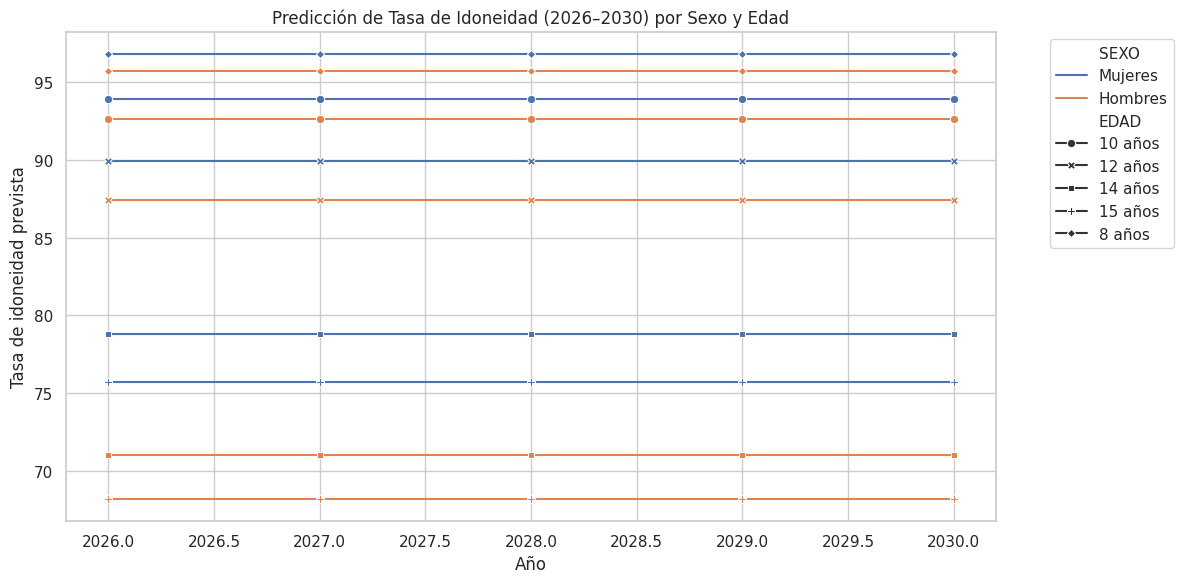

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# Convertir EDAD a tipo ordenado para que se grafique correctamente
df_futuro['EDAD'] = pd.Categorical(df_futuro['EDAD'], categories=sorted(df_futuro['EDAD'].unique()), ordered=True)

# Gráfico: evolución de la tasa por edad y sexo

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_futuro,
    x='TIME_PERIOD#es',
    y='Prediccion',
    hue='SEXO',
    style='EDAD',
    markers=True,
    dashes=False
)

plt.title('Predicción de Tasa de Idoneidad (2026–2030) por Sexo y Edad')
plt.ylabel('Tasa de idoneidad prevista')
plt.xlabel('Año')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Guardar el gráfico como imagen
plt.savefig('grafico_lineas_2026_2030.png', dpi=300)

# Mostrar en pantalla
plt.show()

# Descargar automáticamente en el ordenador
from google.colab import files
files.download('grafico_lineas_2026_2030.png')


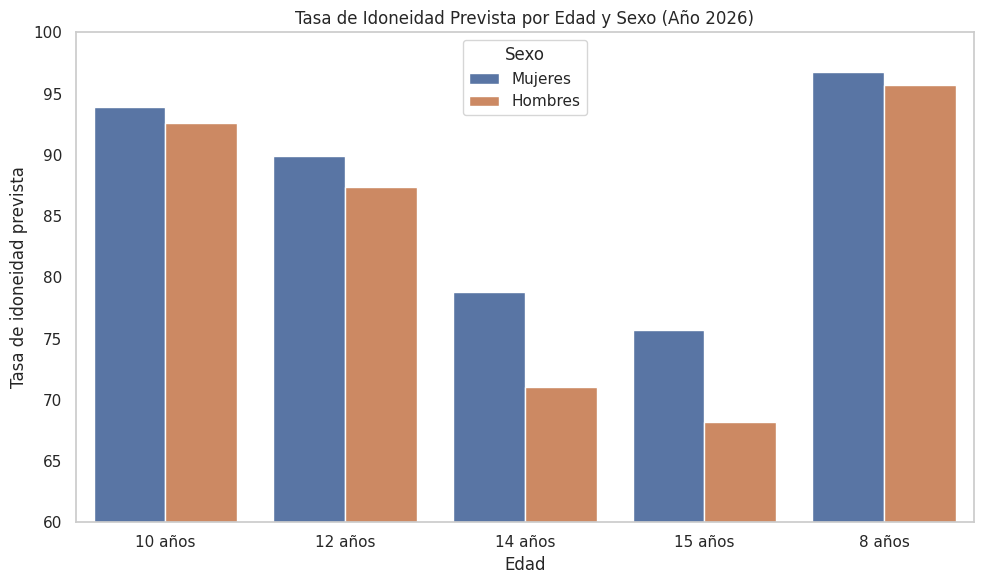

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# Filtrar solo el año 2026
df_2026 = df_futuro[df_futuro['TIME_PERIOD#es'] == 2026].copy()

# Asegurar que la edad esté ordenada correctamente
df_2026['EDAD'] = pd.Categorical(df_2026['EDAD'], categories=sorted(df_2026['EDAD'].unique()), ordered=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_2026, x='EDAD', y='Prediccion', hue='SEXO')
plt.title('Tasa de Idoneidad Prevista por Edad y Sexo (Año 2026)')
plt.ylabel('Tasa de idoneidad prevista')
plt.xlabel('Edad')
plt.ylim(60, 100)  # Para mejorar escala
plt.grid(axis='y')
plt.legend(title='Sexo')
plt.tight_layout()
# Guardar y descargar
plt.savefig('grafico_barras_2026.png', dpi=300)
plt.show()

from google.colab import files
files.download('grafico_barras_2026.png')


In [25]:
# Guardar las predicciones completas en un archivo CSV
df_futuro.to_csv('predicciones_tasa_idoneidad_2026_2030.csv', index=False)

# Descargar el archivo al ordenador
from google.colab import files
files.download('predicciones_tasa_idoneidad_2026_2030.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>